In [74]:
#importing modules 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#linear regression module
from sklearn.linear_model import LinearRegression
#train test splitting 
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import mean_squared_error, r2_score


In [75]:
#taking dataset 
data = pd.read_csv("http://bit.ly/w-data")

In [76]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [77]:
#size of dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [78]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [79]:
#there is no null values or missing values 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [80]:
data.groupby('Hours').agg(['mean','min','max'])['Scores']

,mean,min,max
Hours,,,
1.1,17.0,17,17
1.5,20.0,20,20
1.9,24.0,24,24
2.5,25.5,21,30
2.7,27.5,25,30
3.2,27.0,27,27
3.3,42.0,42,42
3.5,30.0,30,30
3.8,35.0,35,35


In [81]:
# scatterplot of the data points of our dataset 
f = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='Hours', y='Scores', data=data, palette='magma', color='red')

In [82]:
#Preparing Dataset 
# data locating for the model
X = data.iloc[:,0].values.reshape(-1,1)
y= data['Scores']

In [83]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [84]:
print(X_train.shape,X_test.shape)

(17, 1) (8, 1)


In [85]:
# initialising the linear regression model
A = LinearRegression()

In [86]:
# fitting the data to train the model
A.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# predicting the test data
predicted = A.predict(X_test)
predicted

array([49.15675093, 76.41061491, 73.59124967, 82.04934539, 87.68807587,
       61.3740003 , 46.33738569, 34.12013632])

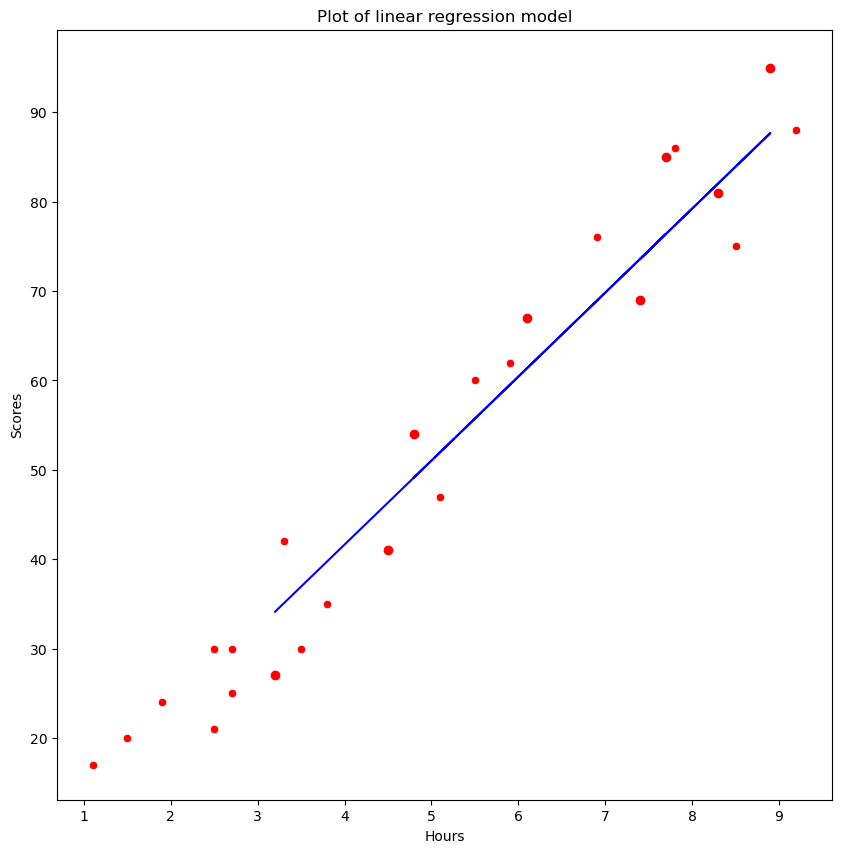

In [88]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, predicted, color='b')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Plot of linear regression model')
plt.show()

In [89]:
# to predict if how much score the student gets if he/she studies for 9.25 hours
print("if the student studies for 9.25 hours")
A.predict([[9.25]])

if the student studies for 9.25 hours


array([90.97733531])

In [90]:
# coefficients and Intercept
print("Coefficient:",A.coef_)
print("Intercept", A.intercept_)

Coefficient: [9.39788413]
Intercept 4.046907092288087


In [91]:
print("Mean Squared Error:",mean_squared_error(y_test, predicted))

Mean Squared Error: 35.4644289202848


In [92]:
print("R2 score:",r2_score(y_test, predicted))

R2 score: 0.9236682881823364


In [93]:
final_score = A.predict([[9.25]])

In [94]:
float(final_score)

90.97733531456896

In [95]:
print("If the student studies for 9.25 hours then he/she will score ",float(final_score),"%")

If the student studies for 9.25 hours then he/she will score  90.97733531456896 %
